<a href="https://colab.research.google.com/github/fitriademiar/Study-Independen/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Membuat Data Frame

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib as plt

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.929902,0.192812,0.278957,0.764349,0.292739,0.392289,0.756999,0.282644,0.421467,0.868051,B
1,0.981340,0.978397,0.559341,0.275186,0.002682,0.331751,0.038770,0.559626,0.394835,0.147691,A
2,0.687232,0.689523,0.054573,0.809075,0.867744,0.305862,0.613909,0.441065,0.717697,0.129470,C
3,0.075660,0.927607,0.916679,0.466740,0.124089,0.660496,0.205724,0.435002,0.290180,0.643915,C
4,0.716103,0.954452,0.224468,0.896710,0.209445,0.935562,0.501364,0.170453,0.964243,0.494259,B


#Memisahkan Variabel x dan Variabel y

In [ ]:
x = df.iloc[:, :-1]
x.head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.142283,0.677451,0.610310,0.699568,0.786202,0.898911,0.373068,0.129221,0.495495,0.883636
1,0.703106,0.017525,0.161118,0.898261,0.038944,0.590563,0.749756,0.526638,0.335970,0.755978
2,0.460634,0.251580,0.048765,0.602159,0.319649,0.696185,0.900960,0.365841,0.552465,0.033390
3,0.388969,0.161919,0.487540,0.642560,0.466296,0.163284,0.449894,0.341780,0.517108,0.918171
4,0.271443,0.378175,0.628979,0.309187,0.783824,0.239367,0.224132,0.491536,0.331908,0.075292


In [ ]:
y = df.iloc[:,-1]
y.head()

0    C
1    A
2    A
3    B
4    B
Name: label, dtype: object

#Reduksi Dimensi Menggunakan PCA

##Import Library

In [ ]:

from sklearn.decomposition import PCA

##Membuat kelas PCA
Memberikan parameter n_components yang mendefinisikan jumlah komponen atau kolom baru yang diinginkan.

In [ ]:
pca = PCA(n_components=2)

##Fit_transform
Nantinya, 10 kolom fitur di atas akan diproses menggunakan teknik PCA sehingga akan mengeluarkan 2 kolom baru hasil reduksi.

In [ ]:
fit_pca = pca.fit_transform(x)

##Membuat Data Frame Baru

In [ ]:
# Type Code Here "DataFrame_FitPCA"
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

finalDf = pd.concat([pca_df, df[['label']]], axis = 1)
finalDf.head(5)

,PCA_1,PCA_2,label
0,0.532843,0.058103,C
1,-0.272250,-0.390189,A
2,-0.290701,0.331465,A
3,0.179406,-0.218982,B
4,-0.089581,0.132921,B


##Visualisasi

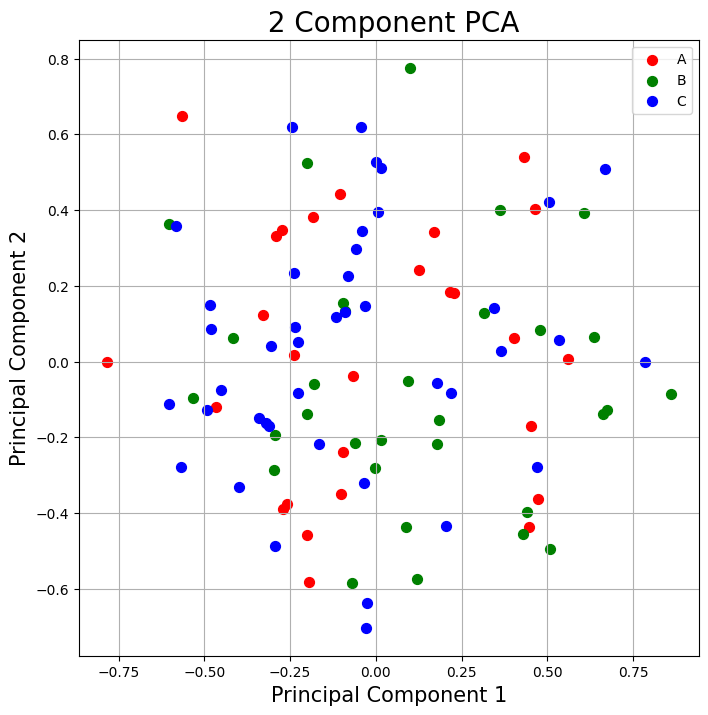

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' 2 Component PCA', fontsize = 20)

targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA_1']
             ,finalDf.loc[indicesToKeep, 'PCA_2']
             ,c = color
             , s = 50)
ax.legend(targets)
ax.grid()

#Reduksi Dimensi Menggunakan LDA

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

##Convert dataset ke model pandas dataframe

In [ ]:
#Load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


##Fit LDA Model

In [ ]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#fit LDA
model = LinearDiscriminantAnalysis()
model.fit(X,y)

LinearDiscriminantAnalysis()

##Evaluasi Model

In [ ]:
#define method evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


In [ ]:
#define new observation
new = [5, 3, 1, .4]

#predic
model.predict([new])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

##Visualisasi Model

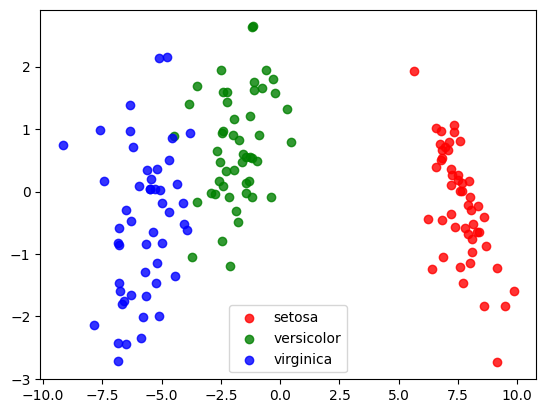

In [ ]:
# define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#Create LDA Plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
              label=target_name)

#add legend
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()


#TUGAS KELOMPOK


##Latihan 1
Membuat model data reduction dengan menggunakan PCA (Principle Componen Analysis), dengan ketentuan sebagai berikut:


1. Buatlah dataFrame dengan jumlah fiture 15
2. Generate dataFrame dengan bilangan float secara random antara 0 dan 1, serta buat n_component berjumlah 2.
3. Membuat Label A, B, C dan D (masing-masing jumlah 150 data), kemudian lanjutkan proses reduksi data model PCA sampai dengan visualisasi data dalam bentuk plot

###Import Library

In [ ]:
# code latihan 1 (PCA)
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

###Membuat Dataframe

In [ ]:
data = {'feature_1': [random.uniform(0, 1) for i in range(150)],
        'feature_2': [random.uniform(0, 1) for i in range(150)],
        'feature_3': [random.uniform(0, 1) for i in range(150)],
        'feature_4': [random.uniform(0, 1) for i in range(150)],
        'feature_5': [random.uniform(0, 1) for i in range(150)],
        'feature_6': [random.uniform(0, 1) for i in range(150)],
        'feature_7': [random.uniform(0, 1) for i in range(150)],
        'feature_8': [random.uniform(0, 1) for i in range(150)],
        'feature_9': [random.uniform(0, 1) for i in range(150)],
        'feature_10': [random.uniform(0, 1) for i in range(150)],
        'feature_11': [random.uniform(0, 1) for i in range(150)],
        'feature_12': [random.uniform(0, 1) for i in range(150)],
        'feature_13': [random.uniform(0, 1) for i in range(150)],
        'feature_14': [random.uniform(0, 1) for i in range(150)],
        'feature_15': [random.uniform(0, 1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C','D']) for i in range(150)]}

In [ ]:
df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.997567,0.840164,0.482422,0.656615,0.308925,0.410806,0.472558,0.984530,0.788371,0.235541,0.847548,0.849364,0.935609,0.261179,0.740442,A
1,0.571371,0.898735,0.847090,0.619303,0.918281,0.855754,0.713836,0.200393,0.844992,0.156558,0.325469,0.005958,0.478037,0.071828,0.373704,C
2,0.882361,0.205037,0.320268,0.099471,0.633447,0.771662,0.142169,0.927903,0.259629,0.908122,0.233513,0.369035,0.827095,0.351238,0.049183,A
3,0.243782,0.092324,0.414572,0.751782,0.440984,0.325681,0.149575,0.742151,0.453341,0.821447,0.758874,0.181941,0.690981,0.839699,0.209769,D
4,0.390575,0.736914,0.809510,0.582887,0.309993,0.901917,0.184360,0.380246,0.916478,0.954559,0.626663,0.725997,0.442732,0.126736,0.668118,A


###Memisahkan Variabel x dan Variabel y

In [ ]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10','feature_11','feature_12','feature_13','feature_14','feature_15']
x = df.loc[:, features].values

In [ ]:
y = df.loc[:,['label']].values

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.997567,0.840164,0.482422,0.656615,0.308925,0.410806,0.472558,0.984530,0.788371,0.235541,0.847548,0.849364,0.935609,0.261179,0.740442
1,0.571371,0.898735,0.847090,0.619303,0.918281,0.855754,0.713836,0.200393,0.844992,0.156558,0.325469,0.005958,0.478037,0.071828,0.373704
2,0.882361,0.205037,0.320268,0.099471,0.633447,0.771662,0.142169,0.927903,0.259629,0.908122,0.233513,0.369035,0.827095,0.351238,0.049183
3,0.243782,0.092324,0.414572,0.751782,0.440984,0.325681,0.149575,0.742151,0.453341,0.821447,0.758874,0.181941,0.690981,0.839699,0.209769
4,0.390575,0.736914,0.809510,0.582887,0.309993,0.901917,0.184360,0.380246,0.916478,0.954559,0.626663,0.725997,0.442732,0.126736,0.668118


###Reduksi Dimensi dengan Menggunakan PCA

In [ ]:
#Membuat kelas PCA
pca = PCA(n_components=2)

#Fit Transform
principalComponents = pca.fit_transform(x)

#Ukuran DataFrame
principalComponents.shape

(150, 2)

In [ ]:
#Membuat Dataframe baru
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.001469,-0.092246
1,0.155061,-0.251547
2,-0.000403,0.078027
3,-0.049611,0.494774
4,-0.605135,-0.193031


In [ ]:
df[['label']].head()

,label
0,A
1,C
2,A
3,D
4,A


In [ ]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,0.001469,-0.092246,A
1,0.155061,-0.251547,C
2,-0.000403,0.078027,A
3,-0.049611,0.494774,D
4,-0.605135,-0.193031,A


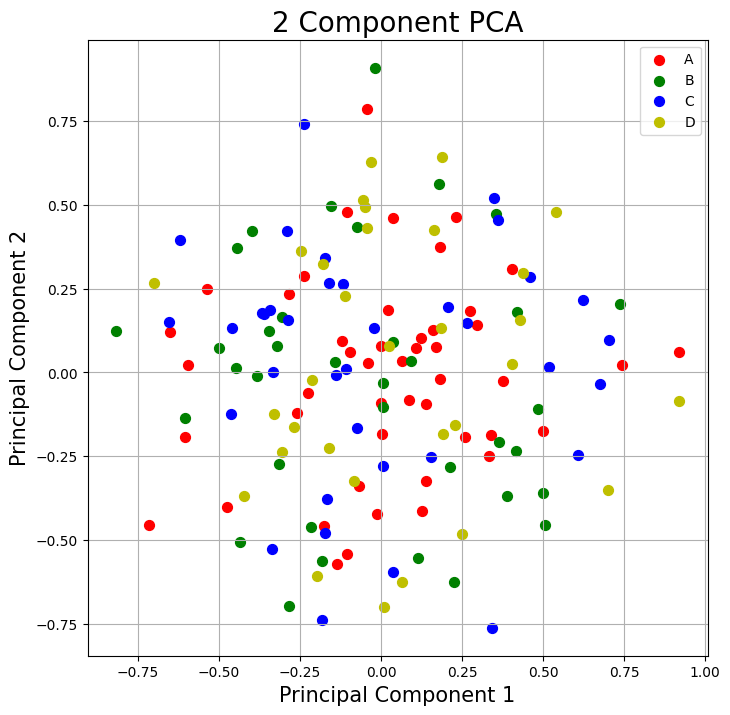

In [ ]:
#Visualisasi
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C','D']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

##Latihan 2

Membuat model data reduction dengan menggunakan LDA (Linear Discriminant Analysis) dengan ketentuan sebagai berikut;


1.   Menggunakan data dari hasil pengukuran bunga iris, silahkan download di sini: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
2.   Tampilkan dataframe untuk variabel x dan y (data tabular). kemudian lanjutkan proses reduksi data model LDA sampai dengan visualisasi data dalam bentuk plot.





###Import library

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

###Convert dataset ke model pandas dataframe

In [ ]:
#load iris dataset
iris = datasets.load_iris()
#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
#find how many total observations are in dataset
len(df.index)

150

###Fit LDA model

In [ ]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']


#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

###Evaluasi model

In [ ]:
#define method evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


In [ ]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


array(['setosa'], dtype='<U10')

###Visualisasi model

In [ ]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names


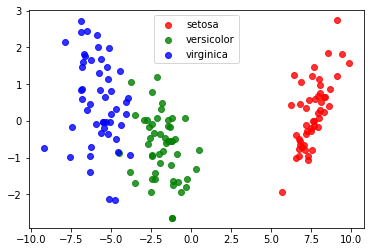

In [ ]:
#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()